In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster,linkage
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv('fifa_18_dataset.csv')
df

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29
...,...,...
17989,10,16
17990,13,44
17991,14,26
17992,47,46


In [3]:
distance=linkage(df[['sliding_tackle','aggression']],method='complete',metric='euclidean')


In [4]:
df['ClusterLabels']=fcluster(distance,3,criterion='maxclust')

<AxesSubplot:xlabel='sliding_tackle', ylabel='aggression'>

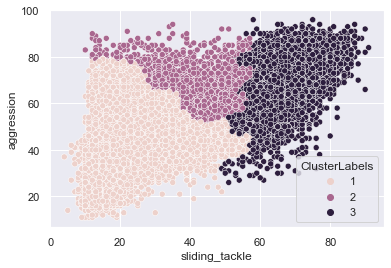

In [5]:
sns.scatterplot(x='sliding_tackle',y='aggression',hue='ClusterLabels',data=df)

In [7]:
plt.show()

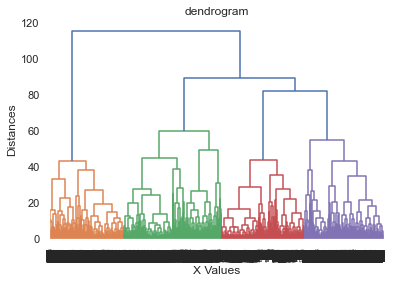

In [8]:
dendrogram= sch.dendrogram(sch.linkage(df,method='complete'))
plt.title('dendrogram')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()

In [9]:
from scipy.cluster.vq import kmeans,vq

In [10]:
x_coordinates=df['sliding_tackle']
y_coordinates=df['aggression']

In [11]:
df=pd.DataFrame({'sliding_tackle':x_coordinates,'aggression':y_coordinates})

In [12]:
df['sliding_tackle']=df['sliding_tackle'].astype(float)
df['aggression']=df['aggression'].astype(float)

In [13]:
centroids,distortions=kmeans(df.iloc[0:3],3)

In [14]:
centroids

array([[26., 48.],
       [33., 56.],
       [23., 63.]])

In [15]:
#Overall distortions for all centroids 
distortions

0.0

In [16]:
labels,distortions2=vq(df.iloc[:,0:25],centroids)

In [17]:
labels

array([2, 0, 1, ..., 0, 1, 1])

In [18]:
distortions2

array([ 0.        ,  0.        ,  0.        , ..., 25.05992817,
       17.20465053, 10.77032961])

In [19]:
distortions2.mean()

24.990014517946626

In [20]:
df['cluster_labels']=labels

In [21]:
df.head()

,sliding_tackle,aggression,cluster_labels
0,23.0,63.0,2
1,26.0,48.0,0
2,33.0,56.0,1
3,38.0,78.0,2
4,11.0,29.0,0


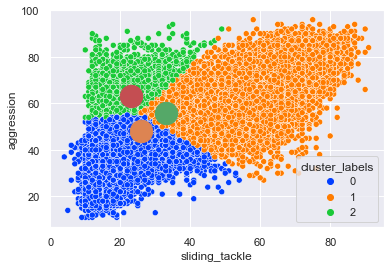

In [24]:
sns.scatterplot(x='sliding_tackle',y='aggression',data=df,hue='cluster_labels',palette='bright')
plt.scatter(x=centroids[0,0],y=centroids[0,1],s=500,cmap='Cyan')
plt.scatter(x=centroids[1,0],y=centroids[1,1],s=500,cmap='Cyan')
plt.scatter(x=centroids[2,0],y=centroids[2,1],s=500,cmap='Cyan')

